In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1: Inspect the data

 - Dataset (and inspiration) from [Eamonn Maguire's CERN-CSC-2023](https://github.com/eamonnmag/CERN-CSC-2023/blob/master/data/fifa_player_data.csv)

#### 1.1: Read data into a pandas dataframe and have a first look at the columns.

In [55]:
data = pd.read_csv('fifa_player_data.csv')
data.keys()

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Jersey Number',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Position',
       'Best Overall Rating', 'Release Clause', 'DefensiveAwareness'],
      dtype='object')

## 2: Bar Plots

### 2.1: Which are the 10 nationalities with the most players? 

You can group your dataframe w.r.t. different columns like `df.groupby('column')`.



In [56]:
nationalitySeries = data.groupby('Nationality').size().sort_values(ascending=False).head(10)
nationalitySeries

Nationality
England          1845
Spain            1151
Germany          1120
France            987
Argentina         846
Brazil            819
Italy             514
Netherlands       443
Portugal          354
United States     341
dtype: int64

### 2.2: Make a bar plot of the countries and their number of players, sorted by the numbers of players.



Text(0, 0.5, 'Number of Players')

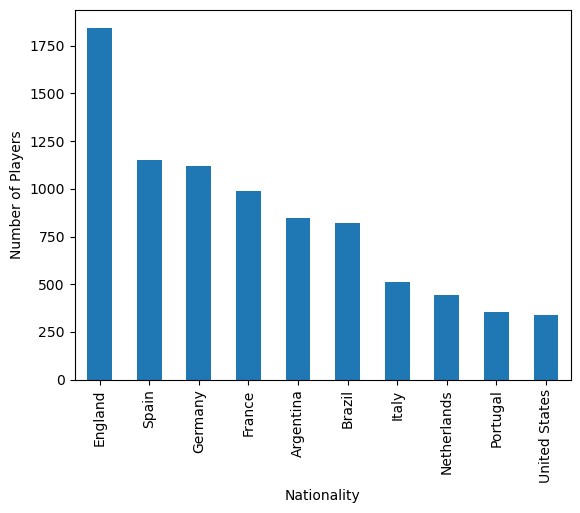

In [57]:
plt.style.use('default')
nationalitySeries.plot.bar()
plt.ylabel('Number of Players')

Text(0, 0.5, 'Number of Players')

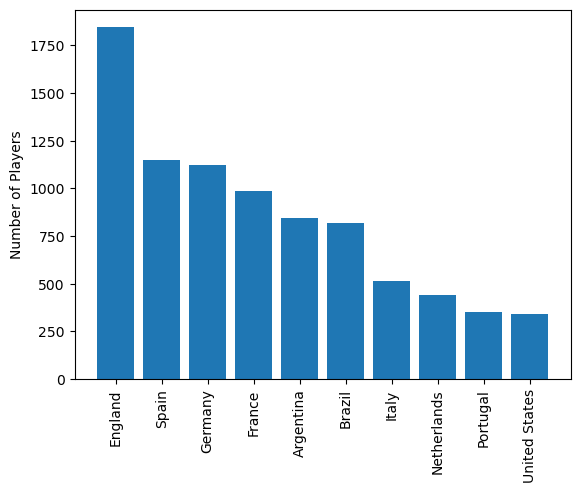

In [58]:
plt.bar(nationalitySeries.index, nationalitySeries)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Players')

### 2.3 Make a pie chart with the same data and compare with the bar chart from 2.2.

([<matplotlib.patches.Wedge at 0x174f848b0>,
 [Text(0.849497261438119, 0.6988235848976023, 'England'),
  Text(-0.2565903692147513, 1.0696547959160647, 'Spain'),
  Text(-0.9715846933831593, 0.5157743533596378, 'Germany'),
  Text(-1.0514808607946788, -0.323091317404974, 'France'),
  Text(-0.6108712766014968, -0.9147875619089154, 'Argentina'),
  Text(0.03570044923650222, -1.0994205191482975, 'Brazil'),
  Text(0.555913272319023, -0.9491893560610316, 'Italy'),
  Text(0.8526176129804743, -0.6950130977438326, 'Netherlands'),
  Text(1.0188397305958168, -0.41468735616057045, 'Portugal'),
  Text(1.0911087859302224, -0.13957656417134043, 'United States')],
 [Text(0.4633621426026103, 0.38117650085323757, '21.9%'),
  Text(-0.13995838320804616, 0.5834480704996715, '13.7%'),
  Text(-0.529955287299905, 0.28133146546889337, '13.3%'),
  Text(-0.5735350149789157, -0.17623162767544034, '11.7%'),
  Text(-0.3332025145099073, -0.4989750337684993, '10.0%'),
  Text(0.019472972310819393, -0.599683919535435, '9.

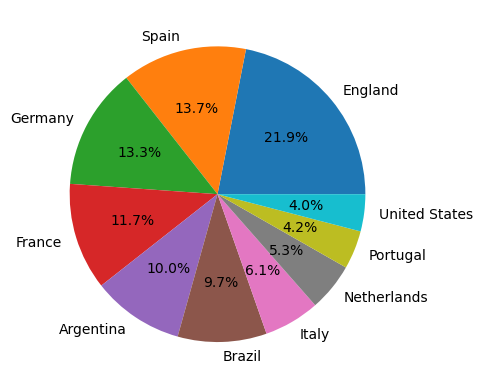

In [59]:
fig, ax = plt.subplots()
ax.pie(nationalitySeries, labels=nationalitySeries.index, autopct='%1.1f%%')

## 3: Histograms

### 3.1: Plot the height distribution for players from the Netherlands, Colombia, Morocco and Uruguay using `plt.hist()` within the same histogram. Use `plt.style.use('..') ` to try out different plotting styles.
You can find the styles [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

In [66]:
data['Height'] = data['Height'].str.replace('cm', '').astype(int)

In [67]:
plt.style.use('default') 

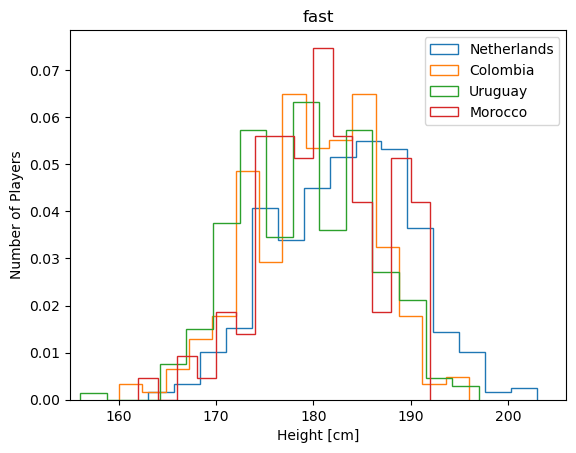

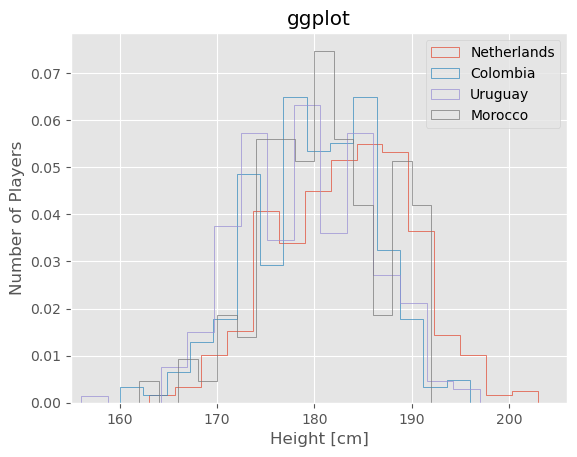

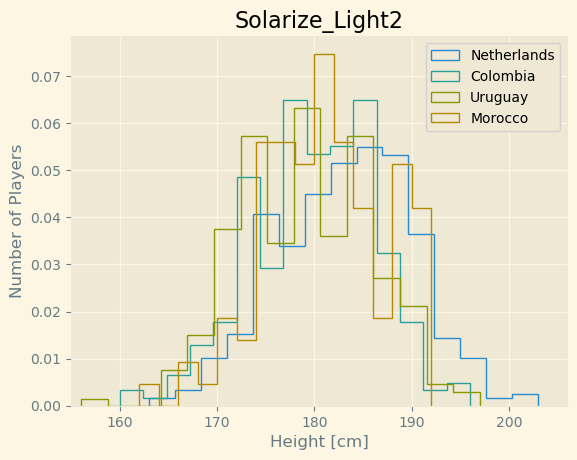

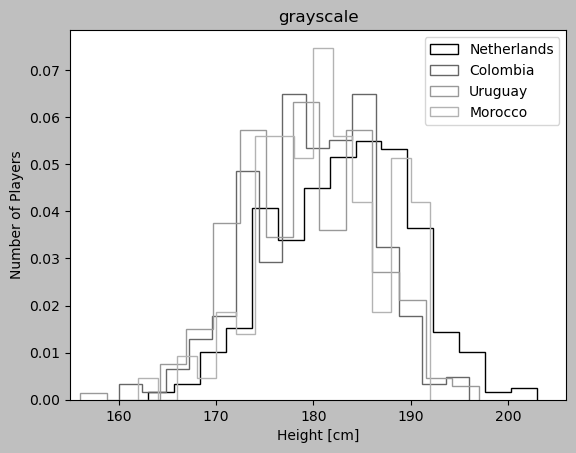

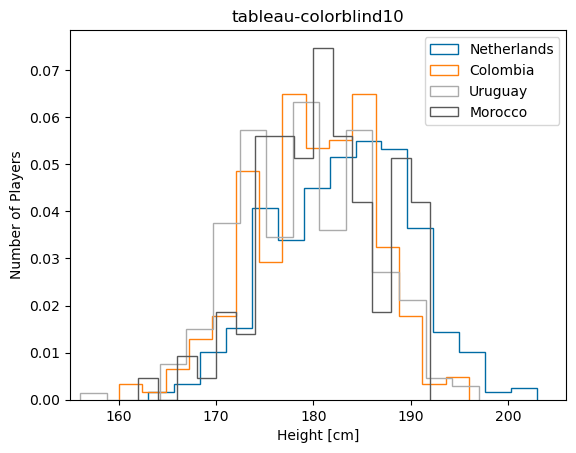

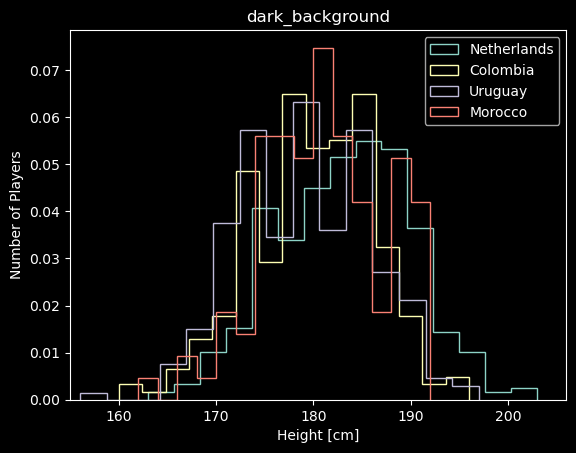

In [75]:
styles = ['fast', 'ggplot', 'Solarize_Light2', 'grayscale', 'tableau-colorblind10', 'dark_background']

for i in range(len(styles)):
    plt.style.use('default') 
    plt.style.use(styles[i]) 
    for country in ['Netherlands', 'Colombia', 'Uruguay', 'Morocco']:
        plt.hist(data.loc[data['Nationality'] == country]['Height'], 15, label=country, histtype='step', density=True) 

    plt.xlim([data['Height'].min(), data['Height'].max()])
    plt.xlabel('Height [cm]')
    plt.ylabel('Number of Players')
    plt.legend()
    plt.title(styles[i])
    plt.show()

### 3.2 Hisgtogram binning - Check out the impact of bin numbers on the visualization for 10, 50 and 120 bins, as well as multiple step types.


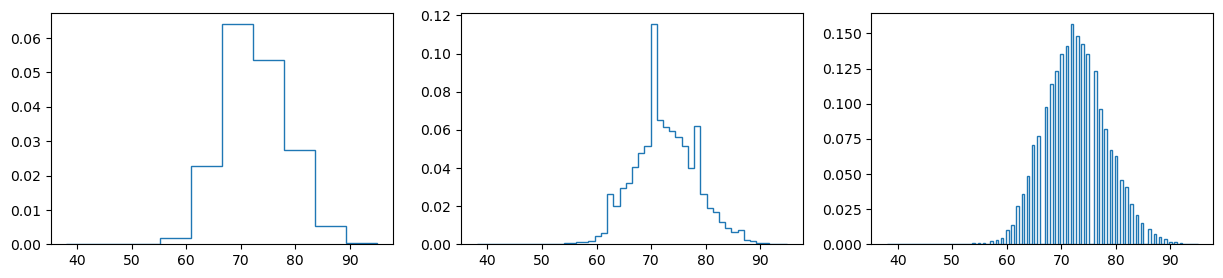

In [64]:
plt.style.use('default')
fig, ax = plt.subplots(1, 3, figsize=(15, 3))

for i, bins in enumerate([10, 50, 120]):
    ax[i].hist(data['Potential'], bins=bins, histtype='step', density=True)

## 4: Correlations

We can use matplotlib and seaborn to visualize correlations between 2 features:

```
plt.scatter(dataframe['column1'], dataframe['column2'])
sns.scatterplot(x='column1', y='column2', data=dataframe) 
```

seaborn is great in that regard, because we can add information of a third column via the argument `hue`.

### 4.1: Which position is best for GKHandling and GKDiving? Which range of Agression do players with high StandingTackle and SlidingTackle generally have?

/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


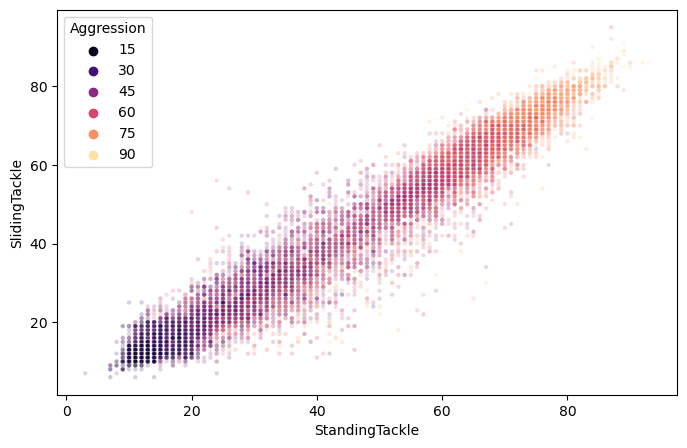

In [32]:
cmap = sns.color_palette("magma", as_cmap=True)

plt.style.use('default')
plt.figure(figsize=(8, 5));
sns.scatterplot(x='StandingTackle', y='SlidingTackle', hue='Aggression', data=data, alpha=0.2, s=10, palette=cmap);

/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarni

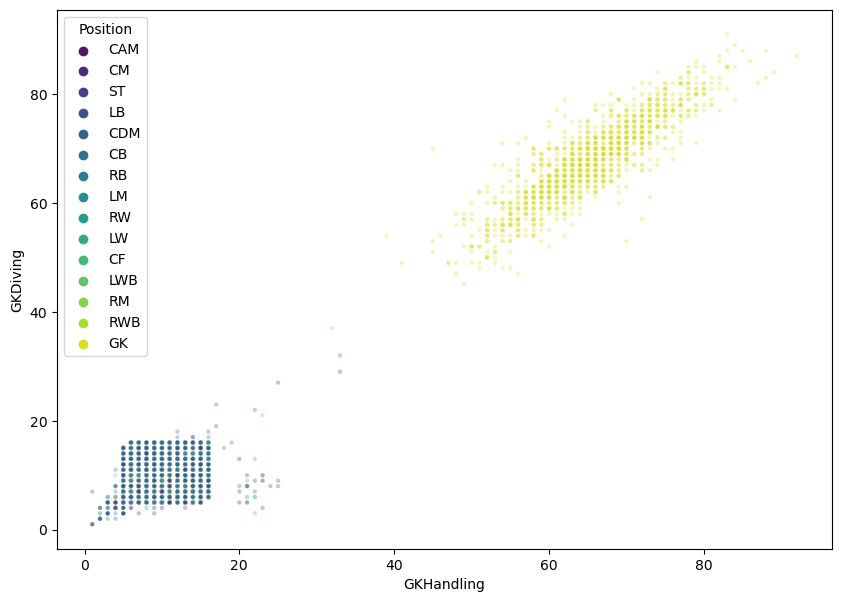

In [33]:
cmap = sns.color_palette("viridis", n_colors=15)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='GKHandling', y='GKDiving', hue='Position', data=data, alpha=0.3, palette=cmap, s=10)
fig.tight_layout()

### 4.2. What kind of correlation do we have between Acceleration and SprintSpeed, between Age and Agility and between Strength and Agility? (Hint: Using `sns.pairplot` can make that very straightforward)

We can use seaborn to plot a whole suite of correlation plots:

```
sns.pairplot(dataframe, vars=['column1', 'column2', 'column3']);
```

In [34]:
data.replace([np.inf, -np.inf], np.nan, inplace=True);
data.dropna();

/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarni

<Figure size 900x900 with 0 Axes>

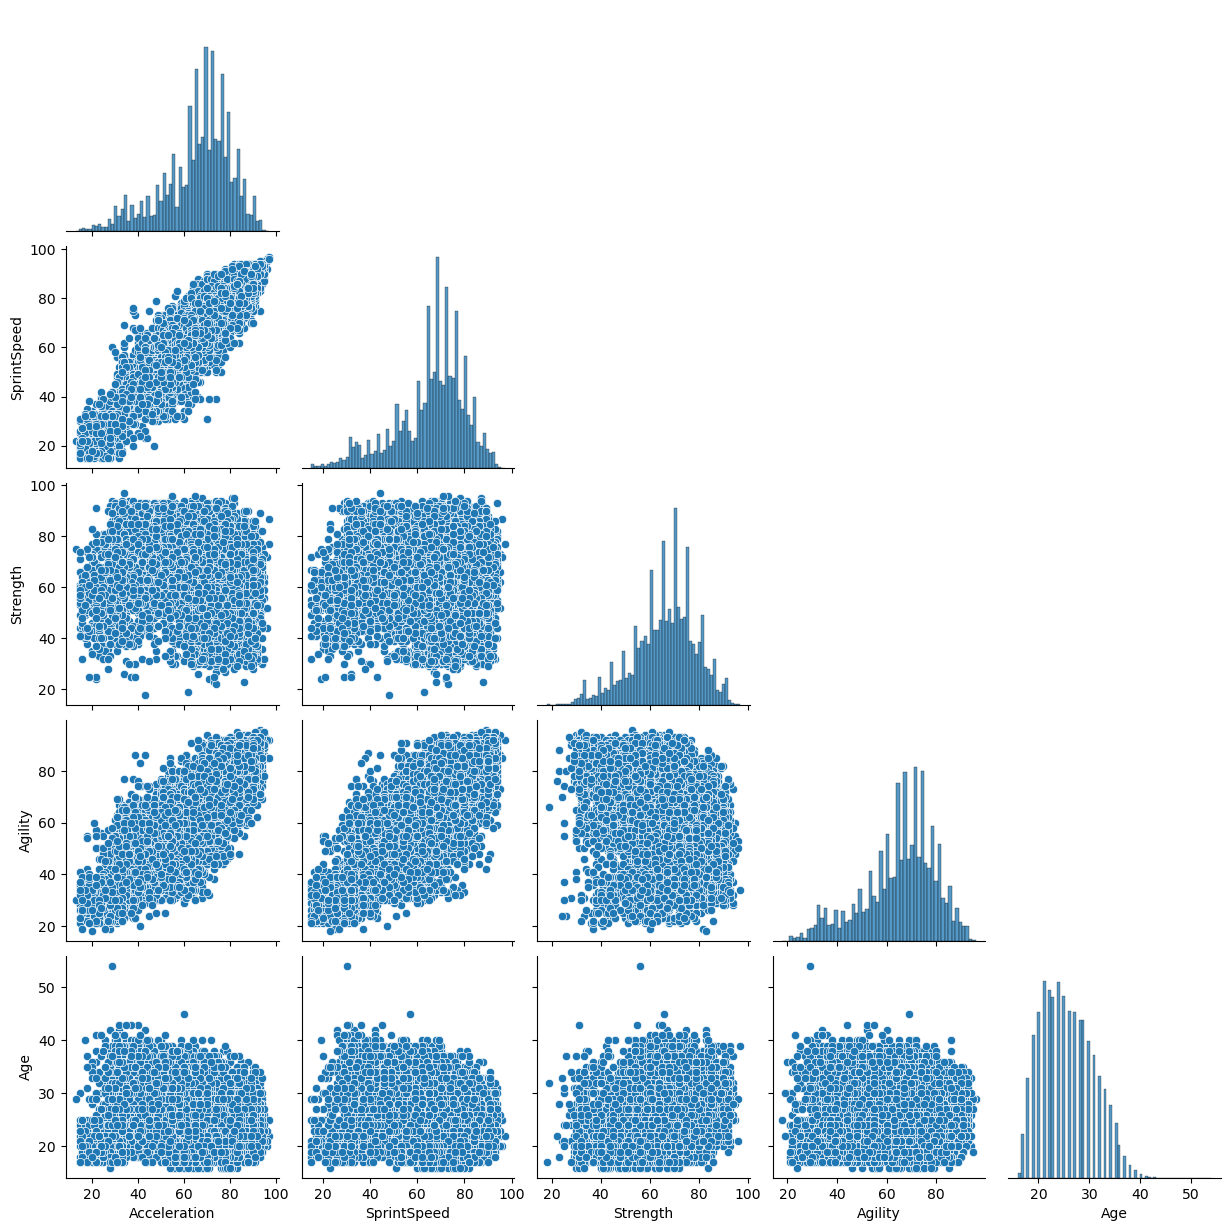

In [35]:
plt.figure(figsize=(9, 9))
sns.pairplot(data, vars=['Acceleration', 'SprintSpeed', 'Strength', 'Agility', 'Age'], corner=True);


fig.tight_layout()

/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/DS_WS2324/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarni

<Figure size 900x900 with 0 Axes>

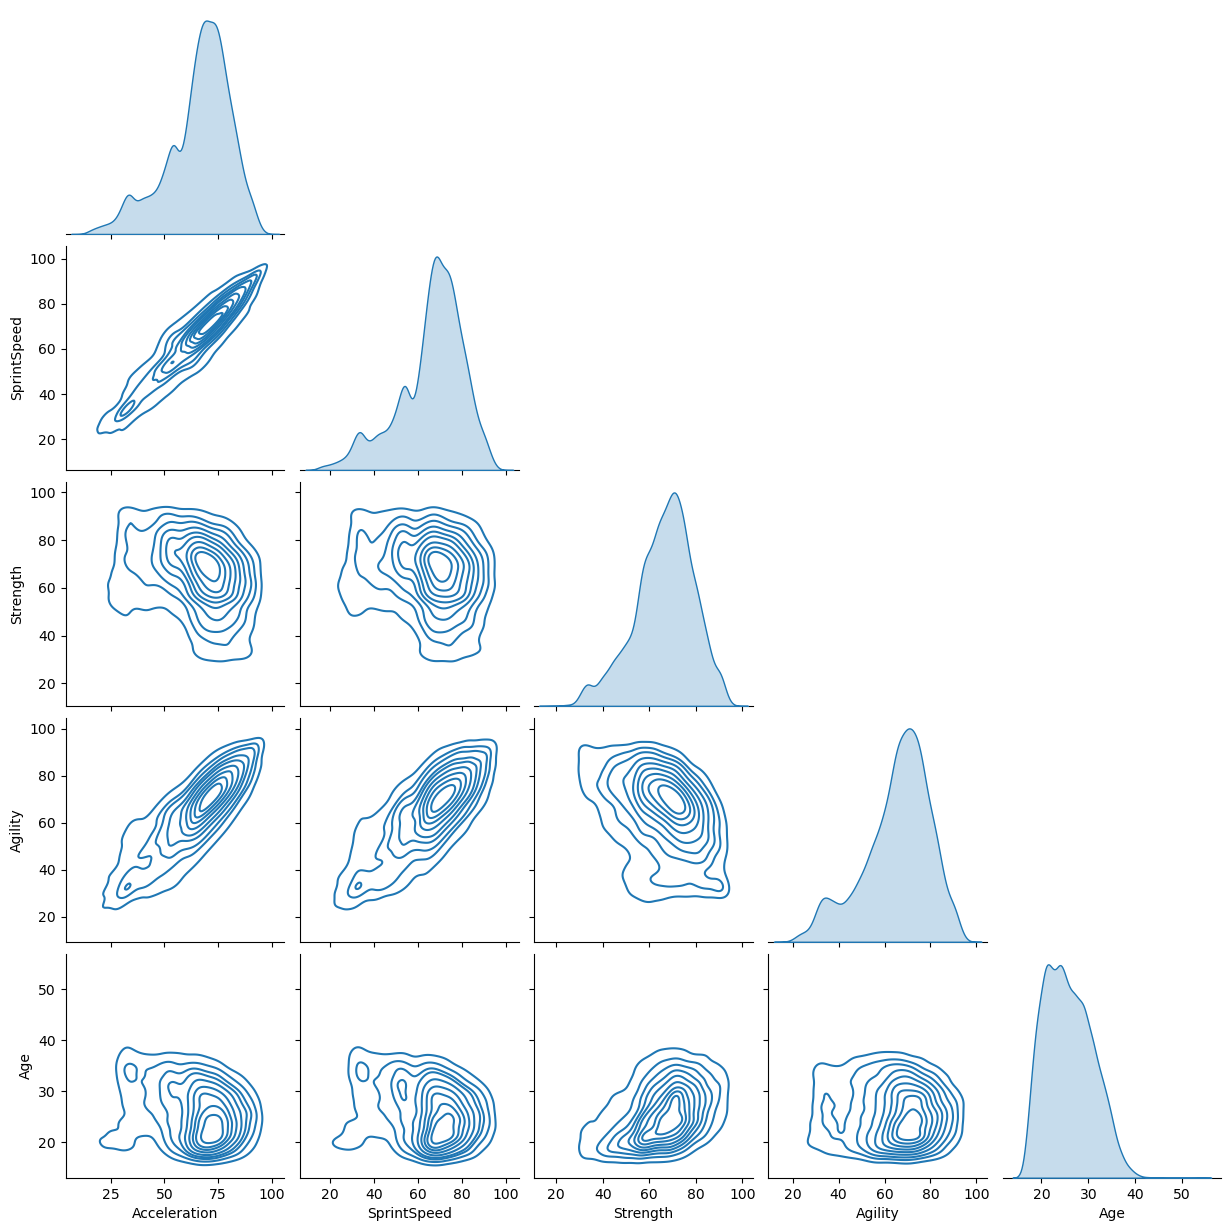

In [36]:
plt.figure(figsize=(9, 9))
sns.pairplot(data, vars=['Acceleration', 'SprintSpeed', 'Strength', 'Agility', 'Age'], kind='kde', corner=True);

fig.tight_layout()

Can you cross-check your visual impression quantitatively?

In [37]:
# Cross-Check your qualitative answer
data[['Acceleration', 'SprintSpeed', 'Strength', 'Agility', 'Age']].corr()

,Acceleration,SprintSpeed,Strength,Agility,Age
Acceleration,1.000000,0.923886,-0.224714,0.819418,-0.237159
SprintSpeed,0.923886,1.000000,-0.118937,0.749724,-0.230065
Strength,-0.224714,-0.118937,1.000000,-0.307087,0.348877
Agility,0.819418,0.749724,-0.307087,1.000000,-0.073190
Age,-0.237159,-0.230065,0.348877,-0.073190,1.000000


### 4.3: Make a heatmap with the following features and try to improve the visual impact and take special care with choosing colors suited for color vision deficiency:

```
['Acceleration', 'GKKicking', 'SprintSpeed', 'Strength', 'Agility', 'GKHandling', 'Age']
```

<Axes: >

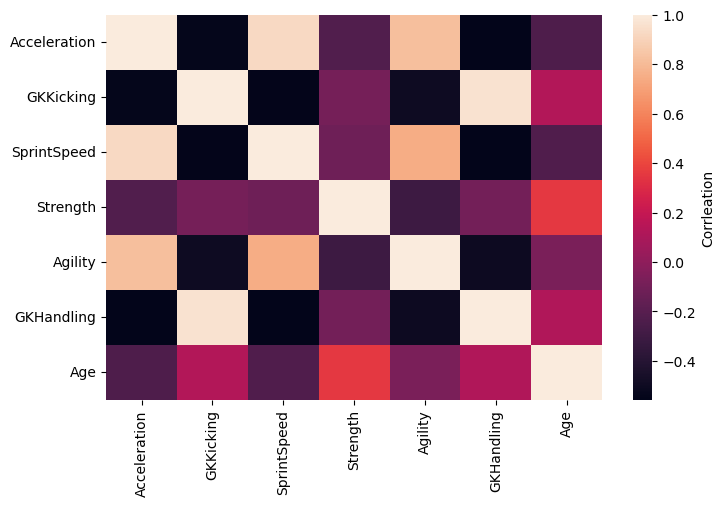

In [38]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[['Acceleration', 'GKKicking', 'SprintSpeed', 'Strength', 'Agility', 'GKHandling', 'Age']].corr(), cbar_kws={'label': 'Corrleation'})

<Axes: >

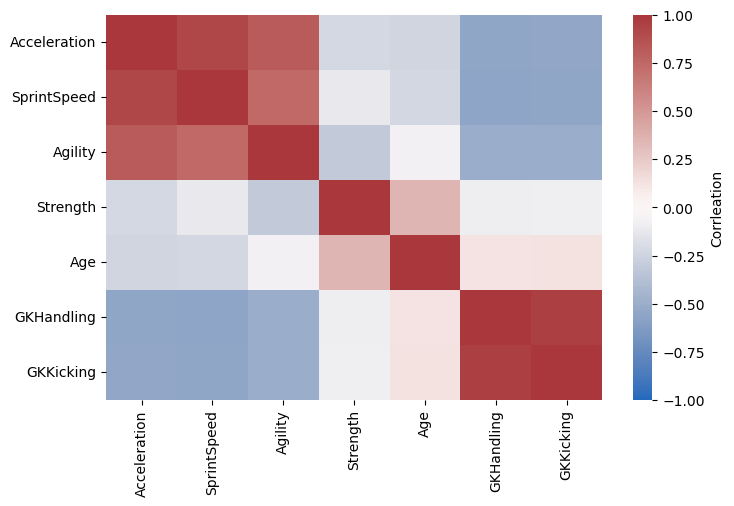

In [39]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[['Acceleration', 'SprintSpeed', 'Agility', 'Strength', 'Age', 'GKHandling', 'GKKicking']].corr(), cmap='vlag', cbar_kws={'label': 'Corrleation'}, center=0.00, vmin=-1., vmax=1.)

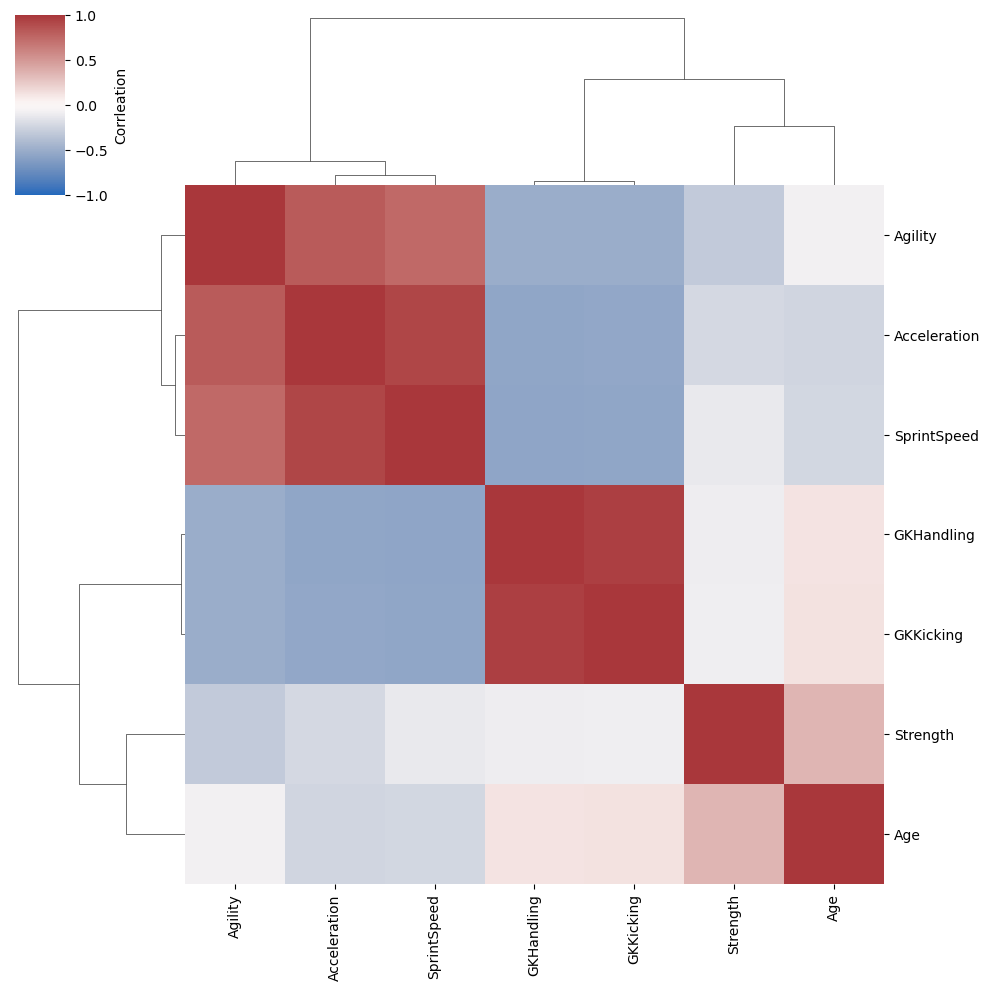

In [40]:
sns.clustermap(data[['Acceleration', 'SprintSpeed', 'Agility', 'Strength', 'Age', 'GKHandling', 'GKKicking']].corr(), cmap='vlag', cbar_kws={'label': 'Corrleation'}, center=0.00, vmin=-1., vmax=1.)

## Bonus Exercise: Color Blindness

Optimize the following plot with [this tool](https://www.color-blindness.com/coblis-color-blindness-simulator/), check what colors work best for color blindness.

<Axes: >

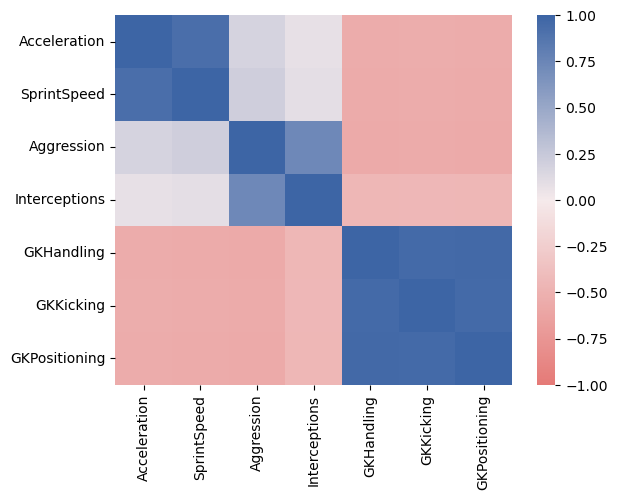

In [41]:
map1 = sns.color_palette("blend:#F00,#0F0", as_cmap=True)
map2 = sns.color_palette("blend:#E57A77,#f5eaeb,#3D65A5", as_cmap=True)
sns.heatmap(data[['Acceleration', 'SprintSpeed', 'Aggression', 'Interceptions', 'GKHandling', 'GKKicking', 'GKPositioning']].corr(), cmap=map2, center=0.00, vmin=-1., vmax=1.)
